 ![Circuit Diagram](Data_lalstadSim/falstad_model_circuit.png)

In [ ]:
from __future__ import division
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy.stats import gaussian_kde

In [ ]:
x_dat = np.genfromtxt("Data_falstadSim/Rv96.9_100us_x.circuitjs.txt",skip_header = 0)
dx_dat = np.genfromtxt("Data_falstadSim/Rv96.9_100us_x'.circuitjs.txt",skip_header = 1)
ddx_dat = np.genfromtxt("Data_falstadSim/Rv96.9_100us_x''.circuitjs.txt",skip_header = 1)

timestep =  0.0001 # seconds

1000000


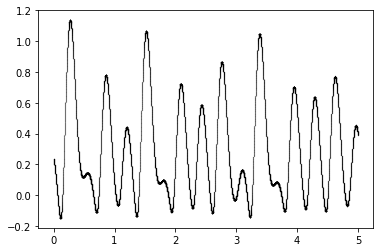

In [ ]:
#Plot over time
_ = len(x_dat)
print(_)
t_dat = np.linspace(0,_*timestep,_)
plt.plot(t_dat[:50000],x_dat[:50000],"k.",markersize=0.1)
#plt.plot(t_dat[:50000],dx_dat[:50000])
#plt.plot(t_dat[:50000],ddx_dat[:50000])
#plt.plot()

1000000
1000000
500001


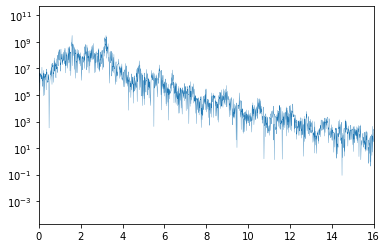

In [ ]:
p = np.abs(np.fft.rfft(x_dat))**2 #xdat is in volts and power = V^2 / R so is perportional up to a resistance
f = np.linspace(0,1/(timestep*2),len(p))
idx = np.argsort(f)

plt.plot(f[idx], p[idx],linewidth = 0.3)
plt.yscale("log")

#plt.plot(freqs[idx], p[idx],linewidth = 0.3)
#freqs = np.fft.fftfreq(x_dat.size, timestep)
#plt.xscale("log")
plt.xlim((0,16))

print(len(x_dat))
print(len(freqs))
print(len(p))

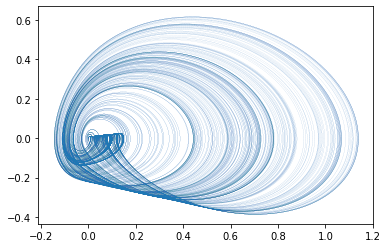

In [ ]:
#Plot XY of x' to x

plt.plot(x_dat,dx_dat,".",markersize = 0.01)

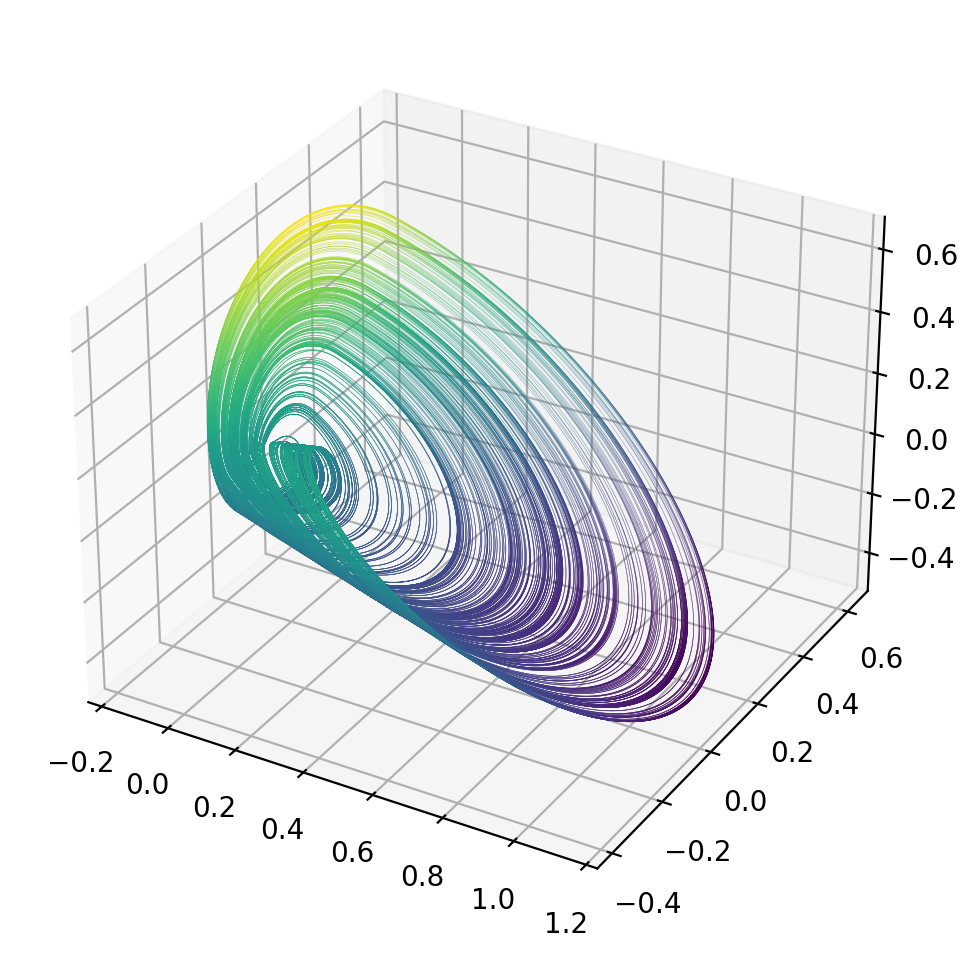

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = plt.axes(projection='3d')

zdata = ddx_dat
xdata = x_dat
ydata = dx_dat
ax.scatter3D(xdata, ydata, zdata, c=zdata,marker = ".", cmap='viridis', linewidth=0.1,s=0.1)

(0.0, 120.0)

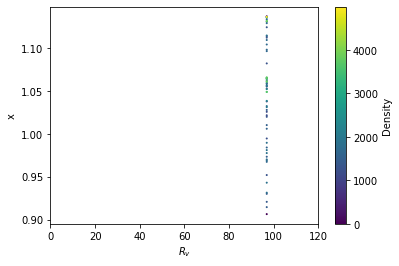

In [ ]:
R = 96.9
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

y_axis = x_dat[:100000]
x_axis = np.ones(len(y_axis))*R

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    From https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s = 1, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax


# detect local max
from scipy.signal import find_peaks
from scipy.signal import argrelextrema

peaks, properties = find_peaks(x_dat, prominence=1, width=20)

Rv = 96.9
localMaxs = x_dat[(peaks)]
resVals = np.ones(len(localMaxs))*Rv
#plt.plot(resVals,localMaxs);

density_scatter( resVals, localMaxs,sort = True, bins = [120,400])
plt.xlabel(r"$R_v$")
plt.ylabel("x")
plt.xlim((0,120))

# probbaly want to do datasets for R_v in about 1 to 120 ohms in 1 or 2 ohm increments

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>